<a href="https://colab.research.google.com/github/YilingHou/Mumax_OVFanalysis/blob/main/OVFanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    import google.colab
except ImportError:
    pass
else:
    !wget https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
    !tar -xvf mumax3.10_linux_cuda10.1.tar.gz
    !rm mumax3.10_linux_cuda10.1.tar.gz
    !rm -rf mumax3.10 && mv mumax3.10_linux_cuda10.1 mumax3.10
    import os
    os.environ['PATH'] += ":/content/mumax3.10"

--2024-09-26 01:35:11--  https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
Resolving mumax.ugent.be (mumax.ugent.be)... 157.193.40.77
Connecting to mumax.ugent.be (mumax.ugent.be)|157.193.40.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150707207 (144M) [application/x-gzip]
Saving to: ‘mumax3.10_linux_cuda10.1.tar.gz’

mumax3.10_linux_cud 100%[===================>] 143.73M  19.4MB/s    in 7.8s    

2024-09-26 01:35:20 (18.5 MB/s) - ‘mumax3.10_linux_cuda10.1.tar.gz’ saved [150707207/150707207]

mumax3.10_linux_cuda10.1/
mumax3.10_linux_cuda10.1/mumax3-server
mumax3.10_linux_cuda10.1/lib/
mumax3.10_linux_cuda10.1/lib/libcurand.so.10
mumax3.10_linux_cuda10.1/lib/libcufft.so.10
mumax3.10_linux_cuda10.1/mumax3
mumax3.10_linux_cuda10.1/LICENSE
mumax3.10_linux_cuda10.1/mumax3-convert


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import run, PIPE, STDOUT
from glob import glob
from os import path
from numpy import load

def read_mumax3_ovffile(ovf_file_path):
    """Load a single ovf file and convert it to a numpy array.

    Args:
        ovf_file_path (str): Path to the ovf file to be converted.

    Returns:
        numpy.ndarray: Numpy array of the converted ovf file.
    """

    from subprocess import run, PIPE, STDOUT
    from os import path
    from numpy import load

    # convert the ovf file to a numpy file
    p = run(["mumax3-convert", "-numpy", ovf_file_path], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))
        return None

    # construct the corresponding numpy file path
    npy_file_path = path.splitext(ovf_file_path)[0] + ".npy"

    # read the numpy file (the converted ovf file)
    return load(npy_file_path)

In [5]:
pathfile_ini = "Initial State/InitialStateRelaxed_nz=30_PBCinitial_updated.ovf"
filename_ini = "/content/drive/My Drive/30 layers sim files/" + pathfile_ini
m_initial = read_mumax3_ovffile(filename_ini)

In [6]:

pathfile = "3 tilt_ovf_updated/Bx_82_Oe_3_tilt.ovf"
filename = "/content/drive/My Drive/30 layers sim files/" + pathfile
print(pathfile)
m1 = read_mumax3_ovffile(filename)
print("type  =", type(m1))
print("shape =", m1.shape)

# pathfile_relaxed = "0 tilt_ovf/Bx_162_Oe_0_tilt.ovf"
# filename_relaxed = "/content/drive/My Drive/30 layers sim files/" + pathfile_relaxed
# m2 = read_mumax3_ovffile(filename_relaxed)

# 6 layers
pathfile2 = "6 layers wVPBC/Bx_162_Oe_-3_tilt.ovf"
filename2 = "/content/drive/My Drive/30 layers sim files/" + pathfile2
print(pathfile2)
m2 = read_mumax3_ovffile(filename2)
print("type  =", type(m2))
print("shape =", m2.shape)
  #6stack initial
pathfile3 = "6 layers wVPBC/initial_state.ovf"
filename3 = "/content/drive/My Drive/30 layers sim files/" + pathfile3
print(pathfile3)
m3 = read_mumax3_ovffile(filename3)
print("type  =", type(m3))
print("shape =", m3.shape)



3 tilt_ovf_updated/Bx_82_Oe_3_tilt.ovf
type  = <class 'numpy.ndarray'>
shape = (3, 30, 512, 512)
6 layers wVPBC/Bx_162_Oe_-3_tilt.ovf
type  = <class 'numpy.ndarray'>
shape = (3, 6, 1024, 1024)
6 layers wVPBC/initial_state.ovf
type  = <class 'numpy.ndarray'>
shape = (3, 6, 1024, 1024)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_my_colorwheel_all(data):
    """
    Make z-direction black and white magnetizations with color for in plane angle.

    Parameters:
    data: converted numpy data

    Returns:
    plot
    """
    fig, axes = plt.subplots(30, 1, figsize=(5, 100))  # 30 rows, 1 column grid of subplots
    axes = axes.flatten()

    for i in range(29, -1, -1):  # Loop through 30 layers in inversed direction
        ax = axes[29 - i]
        Mx = data[0, i]
        My = data[1, i]
        Mz = data[2, i]

        ang = np.arctan2(My, Mx)
        Mz_scaled = (Mz + 1) / 2

        h = (ang + np.pi) / (2 * np.pi)
        s = np.ones_like(h)
        l = Mz_scaled

        c = (1 - np.abs(2 * l - 1)) * s
        h_prime = h * 6
        x = c * (1 - np.abs(h_prime % 2 - 1))

        r, g, b = np.zeros_like(h), np.zeros_like(h), np.zeros_like(h)

        mask = (0 <= h_prime) & (h_prime < 1)
        r[mask], g[mask], b[mask] = c[mask], x[mask], 0

        mask = (1 <= h_prime) & (h_prime < 2)
        r[mask], g[mask], b[mask] = x[mask], c[mask], 0

        mask = (2 <= h_prime) & (h_prime < 3)
        r[mask], g[mask], b[mask] = 0, c[mask], x[mask]

        mask = (3 <= h_prime) & (h_prime < 4)
        r[mask], g[mask], b[mask] = 0, x[mask], c[mask]

        mask = (4 <= h_prime) & (h_prime < 5)
        r[mask], g[mask], b[mask] = x[mask], 0, c[mask]

        mask = (5 <= h_prime) & (h_prime < 6)
        r[mask], g[mask], b[mask] = c[mask], 0, x[mask]

        m = l - 0.5 * c
        r, g, b = r + m, g + m, b + m

        rgb = np.stack((r, g, b), axis=-1)

        # Plot RGB image
        ax.imshow(rgb, origin='lower')

        # Set layer number
        ax.set_ylabel(f'Layer {i}', fontsize=10, rotation=0, labelpad=50, ha='right', va='center')

        # Hide axes
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()
    # Function end

show_my_colorwheel_all(m1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_my(m):
    fig, axes = plt.subplots(3, 3, figsize=(9.5,9.5))
    indices = [(0, 2), (1, 2), (2, 2), (0, 1), (1, 1), (2, 1), (0, 0), (1, 0), (2, 0)]
    colormap = "bwr"
    axis_labels = ["mx", "my", "mz"]
    # 3D function

    for ax, (ic, iz) in zip(axes.flat, indices):
        my = m[ic, iz, :, :]
        im = ax.imshow(my, vmin=-1, vmax=1, cmap=colormap)
        ax.invert_yaxis()

        if ic == 0:
            ax.set_ylabel(f'Layer {iz}', fontsize=12, rotation=0, labelpad=50, ha='right', va='center')

        if iz == 2:
            ax.set_title(f'{axis_labels[ic]}', fontsize=12)

        ax.axis('on')

    # Manually adjust subplot positions
    for i, ax in enumerate(axes.flat):
        pos = ax.get_position()
        if i % 3 == 0:
            pos.x0 -= 0.08
        if i // 3 == 0:
            pos.y0 += 0.01
            pos.y1 += 0.01
        if i // 3 == 1:
            pos.y0 += 0.005
            pos.y1 += 0.005
        ax.set_position(pos)

    # Adjust layout and colorbar position
    fig.subplots_adjust(left=0.1, right=0.85, wspace=0.2, hspace=0.2)
    cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)

    fig.text(0.45, 0.05, f' {pathfile_ini}', ha='center', fontsize=12)

    plt.show()
    # Function end

show_my(m1)

In [ ]:
pathfile = "pathfile" # Testing use

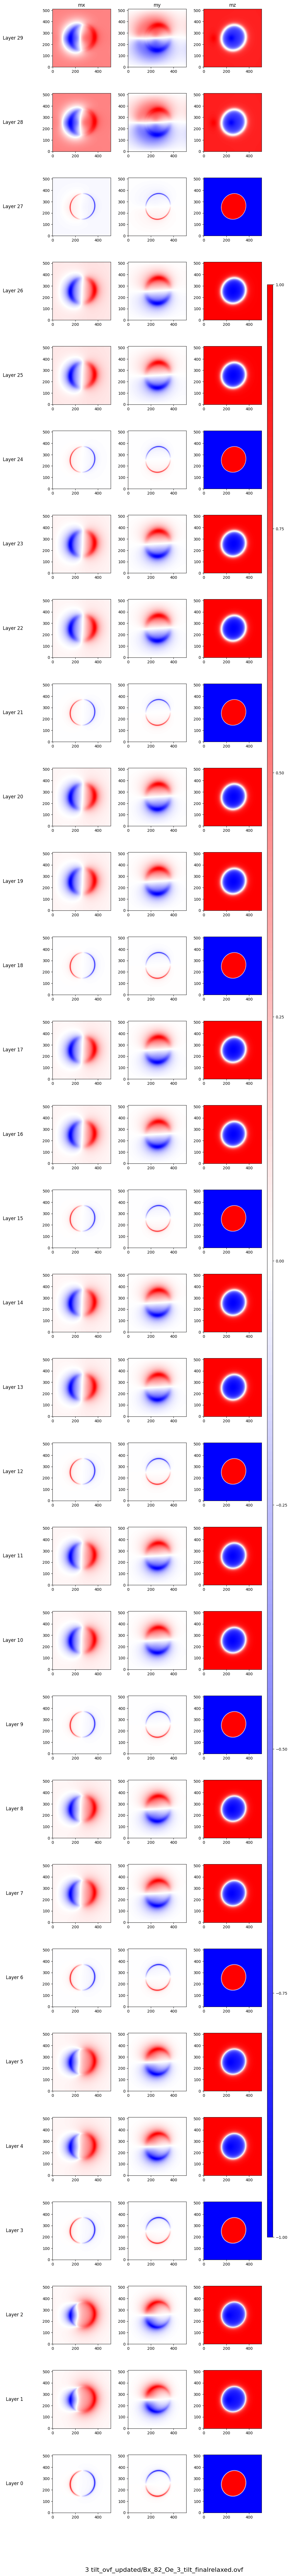

In [ ]:
import matplotlib.pyplot as plt

def show_my_all(m):
    fig, axes = plt.subplots(30, 3, figsize=(10, 100))  # 30x3 grid of subplots
    colormap = "bwr"
    axis_labels = ["mx", "my", "mz"]

    for ax, (ic, iz) in zip(axes.flat, [(ic, iz) for iz in reversed(range(30)) for ic in range(3)]):
        my = m[ic, iz, :, :]
        im = ax.imshow(my, vmin=-1, vmax=1, cmap=colormap)
        ax.invert_yaxis()

        # Layer title
        if ic == 0:
            ax.set_ylabel(f'Layer {iz}', fontsize=12, rotation=0, labelpad=50, ha='right', va='center')

        # Axis label
        if iz == 29:
            ax.set_title(f'{axis_labels[ic]}', fontsize=12)

        ax.axis('on')

    # Adjust the layout and colorbar position
    fig.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
    cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)

    fig.text(0.5, 0.03, f'{pathfile}', ha='center', fontsize=16)

    plt.show()
    # Function end

show_my_all(m1)


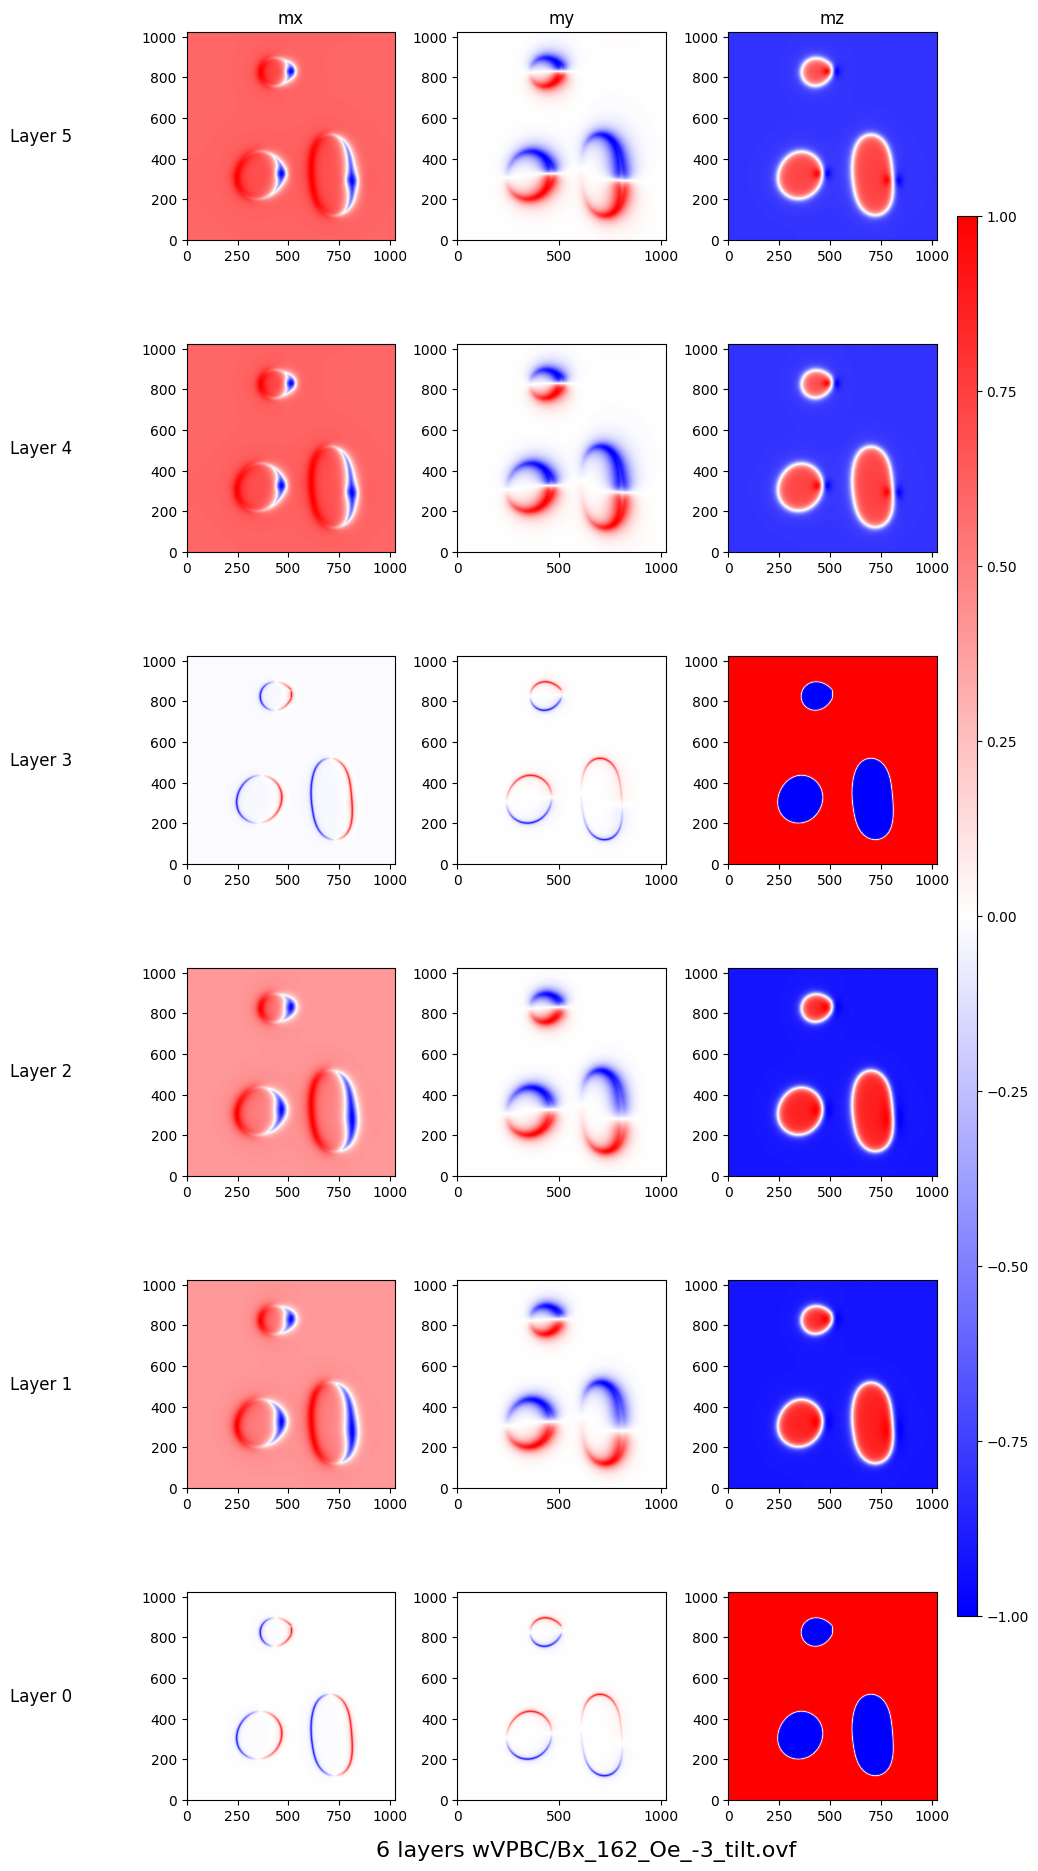

In [ ]:
import matplotlib.pyplot as plt

def show_my_all(m):
    fig, axes = plt.subplots(6, 3, figsize=(10, 20))  # Create a 6x3 grid of subplots with a larger figure size
    colormap = "bwr"
    axis_labels = ["mx", "my", "mz"]

    for ax, (ic, iz) in zip(axes.flat, [(ic, iz) for iz in reversed(range(6)) for ic in range(3)]):
        my = m[ic, iz, :, :]
        im = ax.imshow(my, vmin=-1, vmax=1, cmap=colormap)
        ax.invert_yaxis()

        if ic == 0:
            ax.set_ylabel(f'Layer {iz}', fontsize=12, rotation=0, labelpad=50, ha='right', va='center')

        if iz == 5:
            ax.set_title(f'{axis_labels[ic]}', fontsize=12)

        ax.axis('on')

    # Adjust the layout and colorbar position
    fig.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
    cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)

    fig.text(0.5, 0.03, f'{pathfile2}', ha='center', fontsize=16)

    plt.show()
    # Function end
show_my_all(m2)

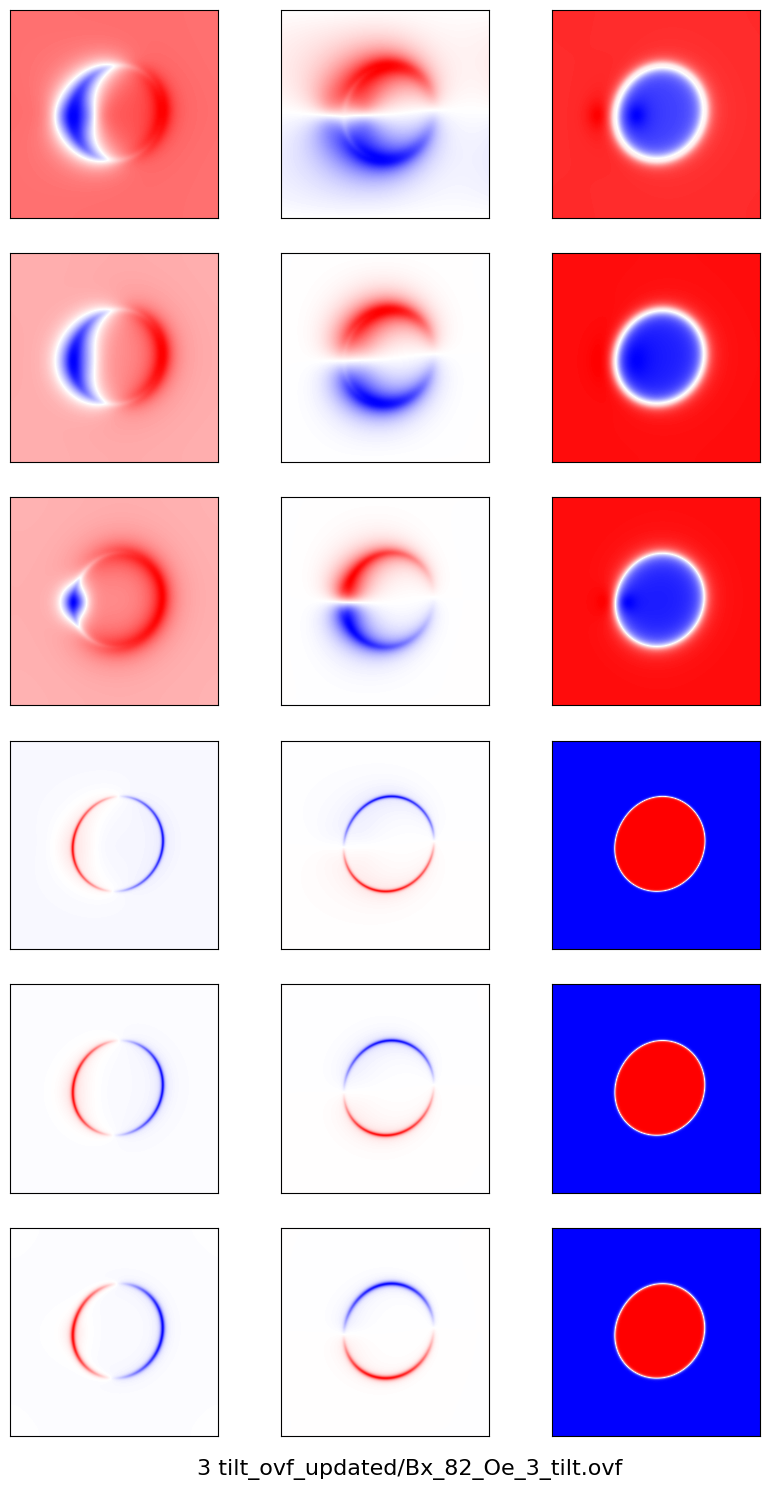

In [ ]:
import matplotlib.pyplot as plt

def show_selected_layers(m):
    # Define the specific layers to display
    layers_to_show = [28,16,1,27,15,0]
    fig, axes = plt.subplots(len(layers_to_show), 3, figsize=(10, 16), facecolor='none')
    fig.patch.set_alpha(0.0)  # transparent background
    colormap = "bwr"

    for row, iz in enumerate(layers_to_show):
        for ic, ax in enumerate(axes[row]):
            my = m[ic, iz, :, :]
            img = ax.imshow(my, vmin=-1, vmax=1, cmap=colormap)
            ax.invert_yaxis()
            ax.set_facecolor('none')

            # Remove ticks and labels
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])

    # Adjust the layout
    fig.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05, wspace=0.3, hspace=0.1)
    fig.text(0.5, 0.03, f'{pathfile}', ha='center', fontsize=16)

    plt.show()
    # Function end
show_selected_layers(m1)


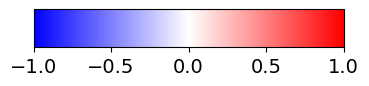

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# color bar
# bwr colormap
cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

fig, ax = plt.subplots(figsize=(4, 1))
fig.subplots_adjust(bottom=0.5)
fig.patch.set_alpha(0) # transparent background
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal',
                               ticks=[-1.0, -0.5, 0, 0.5, 1.0])
cb.ax.tick_params(labelsize=14)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_difference(m1, m2, name):

    # Compute the difference between the two datasets
    m_diff = m1 - m2

    # Plot the difference using the existing plotting function
    fig, axes = plt.subplots(30, 3, figsize=(10, 100))
    colormap = "Greys"
    axis_labels = ["mx", "my", "mz"]

    for ax, (ic, iz) in zip(axes.flat, [(ic, iz) for iz in reversed(range(30)) for ic in range(3)]):
        my = m_diff[ic, iz, :, :]
        im = ax.imshow(my, vmin=-1, vmax=1, cmap=colormap)
        ax.invert_yaxis()

        if ic == 0:
            ax.set_ylabel(f'Layer {iz}', fontsize=12, rotation=0, labelpad=50, ha='right', va='center')

        if iz == 29:
            ax.set_title(f'{axis_labels[ic]}', fontsize=12)

        ax.axis('on')

    # Adjust the layout and colorbar position
    fig.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
    cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)

    fig.text(0.5, 0.03, f'{name}', ha='center', fontsize=16)

    plt.show()
    # Function end

name = "0 tilt_162 Oe"
show_difference(m1, m2, name)


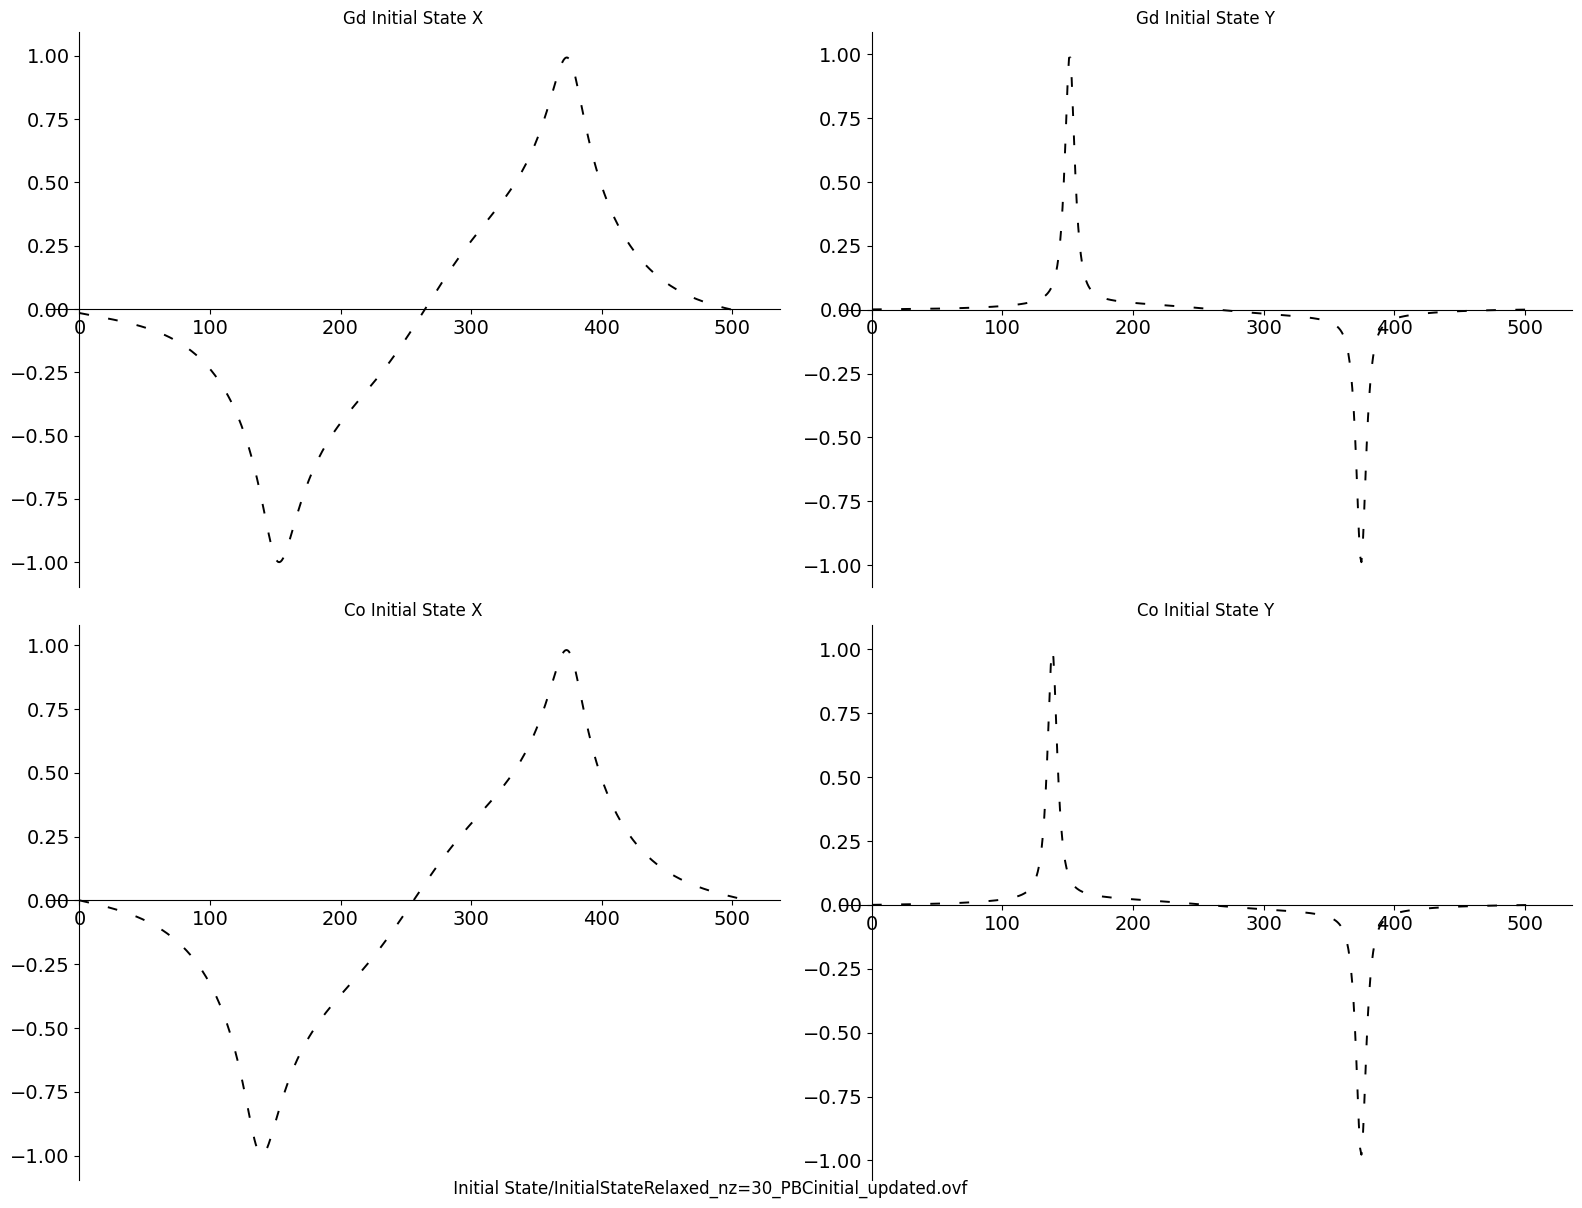

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_initial_line(ax, m_initial_line, linewidth=0.5):
    # Plotting the initial line with the original style (dashed line)
    ax.plot(m_initial_line, color='black', linewidth=linewidth, linestyle=(0, (5, 10)), label="Initial state")

    # Setting spines
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Ticks handling: keeping y-ticks on the left and x-ticks bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # Increase the size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)

def show_my_2D(m_initial, linewidth=1.4):
    # Selecting initial lines for Co and Gd
    initial_line_Gd_X = m_initial[0, 1, 250, :]  # Example of Gd
    initial_line_Co_X = m_initial[0, 0, 250, :]  # Example of Co
    initial_line_Gd_Y = m_initial[1, 1, :, 250]  # Example of Gd
    initial_line_Co_Y = m_initial[1, 0, :, 250]  # Example of Co

    fig, axs = plt.subplots(2, 2, figsize=(16,12))

    # Plot one Gd and one Co initial line on separate subplots
    plot_initial_line(axs[0, 0], initial_line_Gd_X, linewidth)
    plot_initial_line(axs[0, 1], initial_line_Co_X, linewidth)
    plot_initial_line(axs[1, 0], initial_line_Gd_Y, linewidth)
    plot_initial_line(axs[1, 1], initial_line_Co_Y, linewidth)

    # Adding titles for each plot
    axs[0, 0].set_title('Gd Initial State X')
    axs[0, 1].set_title('Gd Initial State Y')
    axs[1, 0].set_title('Co Initial State X')
    axs[1, 1].set_title('Co Initial State Y')

    plt.tight_layout()
    fig.text(0.45, 0.001, f' {pathfile_ini}', ha='center', fontsize=12)
    plt.show()
    # Function end
show_my_2D(m_initial)


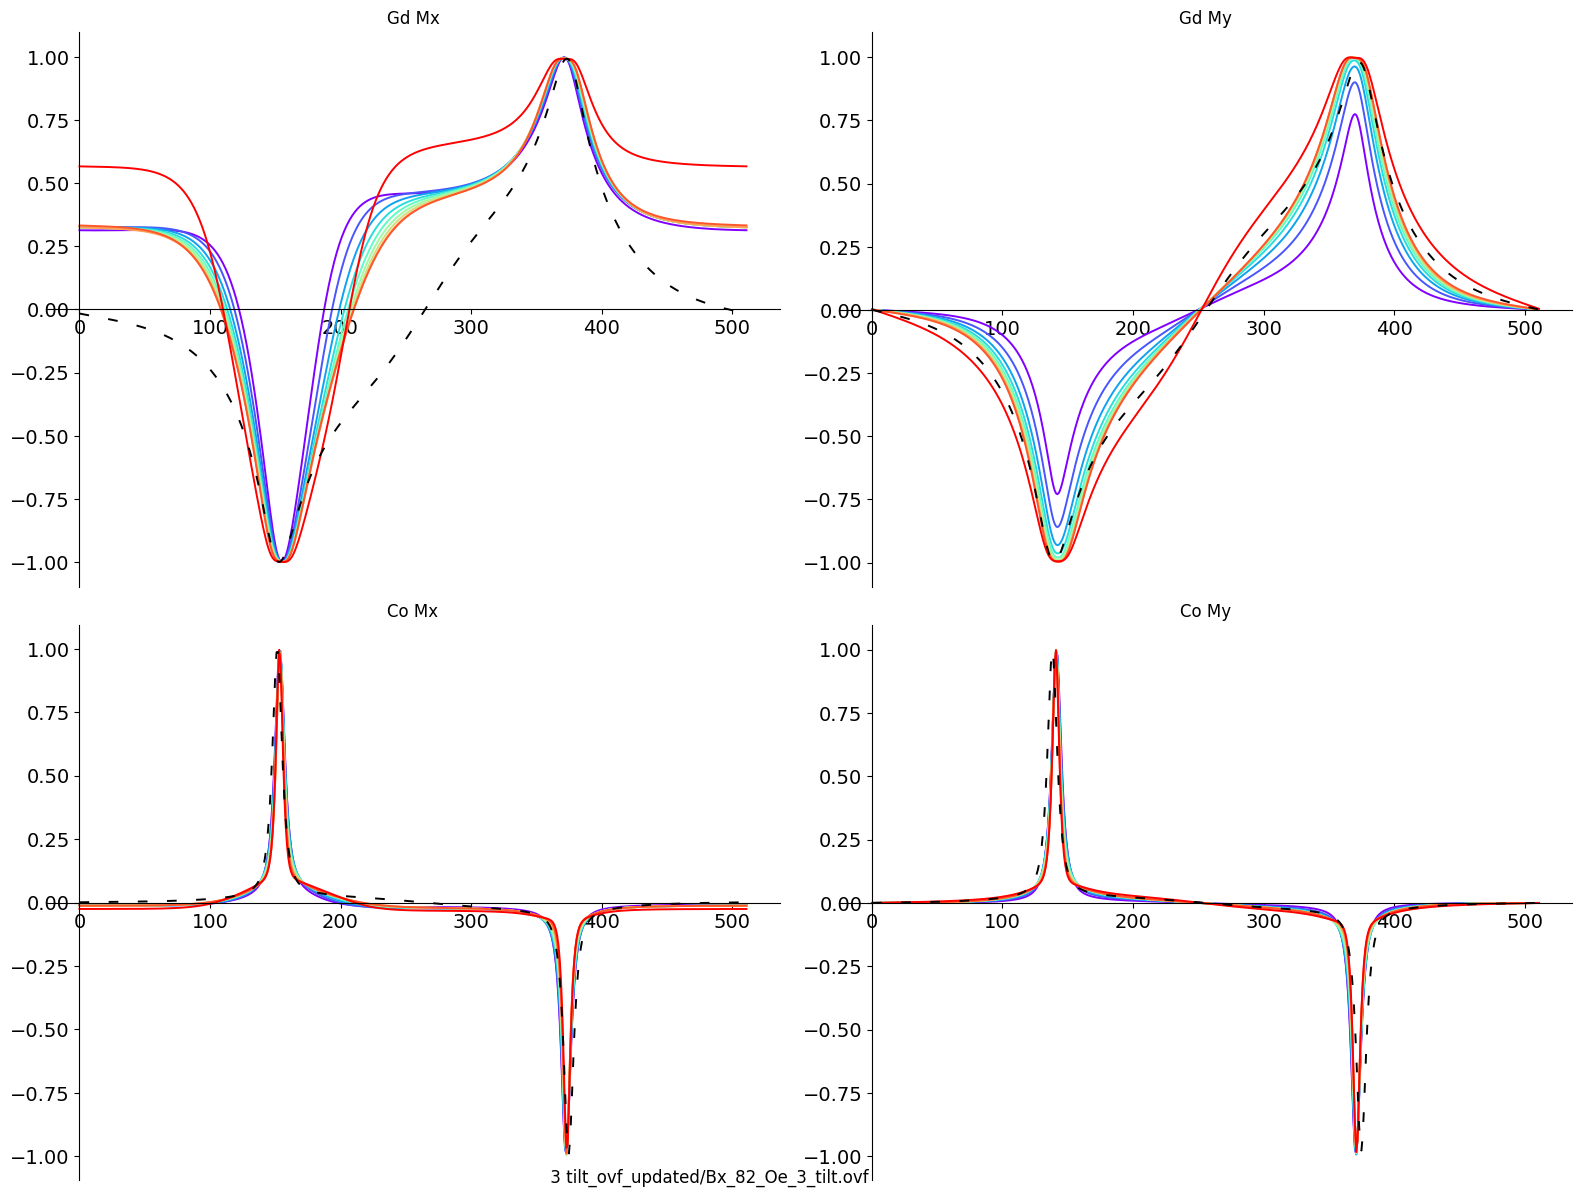

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(data, ax, m_initial_line, linewidth=0.5):
    num_lines = len(data)
    # Colormap
    color_map = plt.cm.rainbow(np.linspace(0, 1, num_lines))

    # Plotting the lines from m with the color gradient
    for idx, line in enumerate(data):
        ax.plot(line, color=color_map[idx], linewidth=linewidth)

    # Plotting the initial line with the original style
    initial_line_handle, = ax.plot(m_initial_line, color='black', linewidth=linewidth, linestyle=(0, (5, 10)), label="Initial state")

    # Setting spines: moving bottom spine to y=0 and left spine stays default
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Ticks handling: keeping y-ticks on the left and x-ticks bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # Increase the size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)

def show_my_2D(m, m_initial, linewidth=1.4):
    # Extracting the required slices and plotting them
    indices_1 = list(range(0, 30, 3))
    indices_2 = list(range(1, 29, 3))
    slices_1 = [m[0, i, 250, :] for i in indices_1]
    slices_2 = [m[0, i, 250, :] for i in indices_2]
    slices_3 = [m[1, i, :, 250] for i in indices_1]
    slices_4 = [m[1, i, :, 250] for i in indices_2]

    # Selecting initial lines for Co and Gd
    initial_line_Co_X = m_initial[0, 0, 250, :]
    initial_line_Gd_X = m_initial[0, 1, 250, :]
    initial_line_Co_Y = m_initial[1, 0, :, 250]
    initial_line_Gd_Y = m_initial[1, 1, :, 250]

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Assign plots to their respective axes
    plot_lines(slices_2, axs[0, 0], initial_line_Gd_X, linewidth)
    plot_lines(slices_4, axs[0, 1], initial_line_Gd_Y, linewidth)
    plot_lines(slices_1, axs[1, 0], initial_line_Co_X, linewidth)
    plot_lines(slices_3, axs[1, 1], initial_line_Co_Y, linewidth)

    # Adding titles for each plot
    axs[0, 0].set_title('Gd Mx')
    axs[0, 1].set_title('Gd My')
    axs[1, 0].set_title('Co Mx')
    axs[1, 1].set_title('Co My')

    plt.tight_layout()
    fig.text(0.45, 0.01, f' {pathfile}', ha='center', fontsize=12)
    plt.show()
    # Function end

show_my_2D(m1, m_initial)


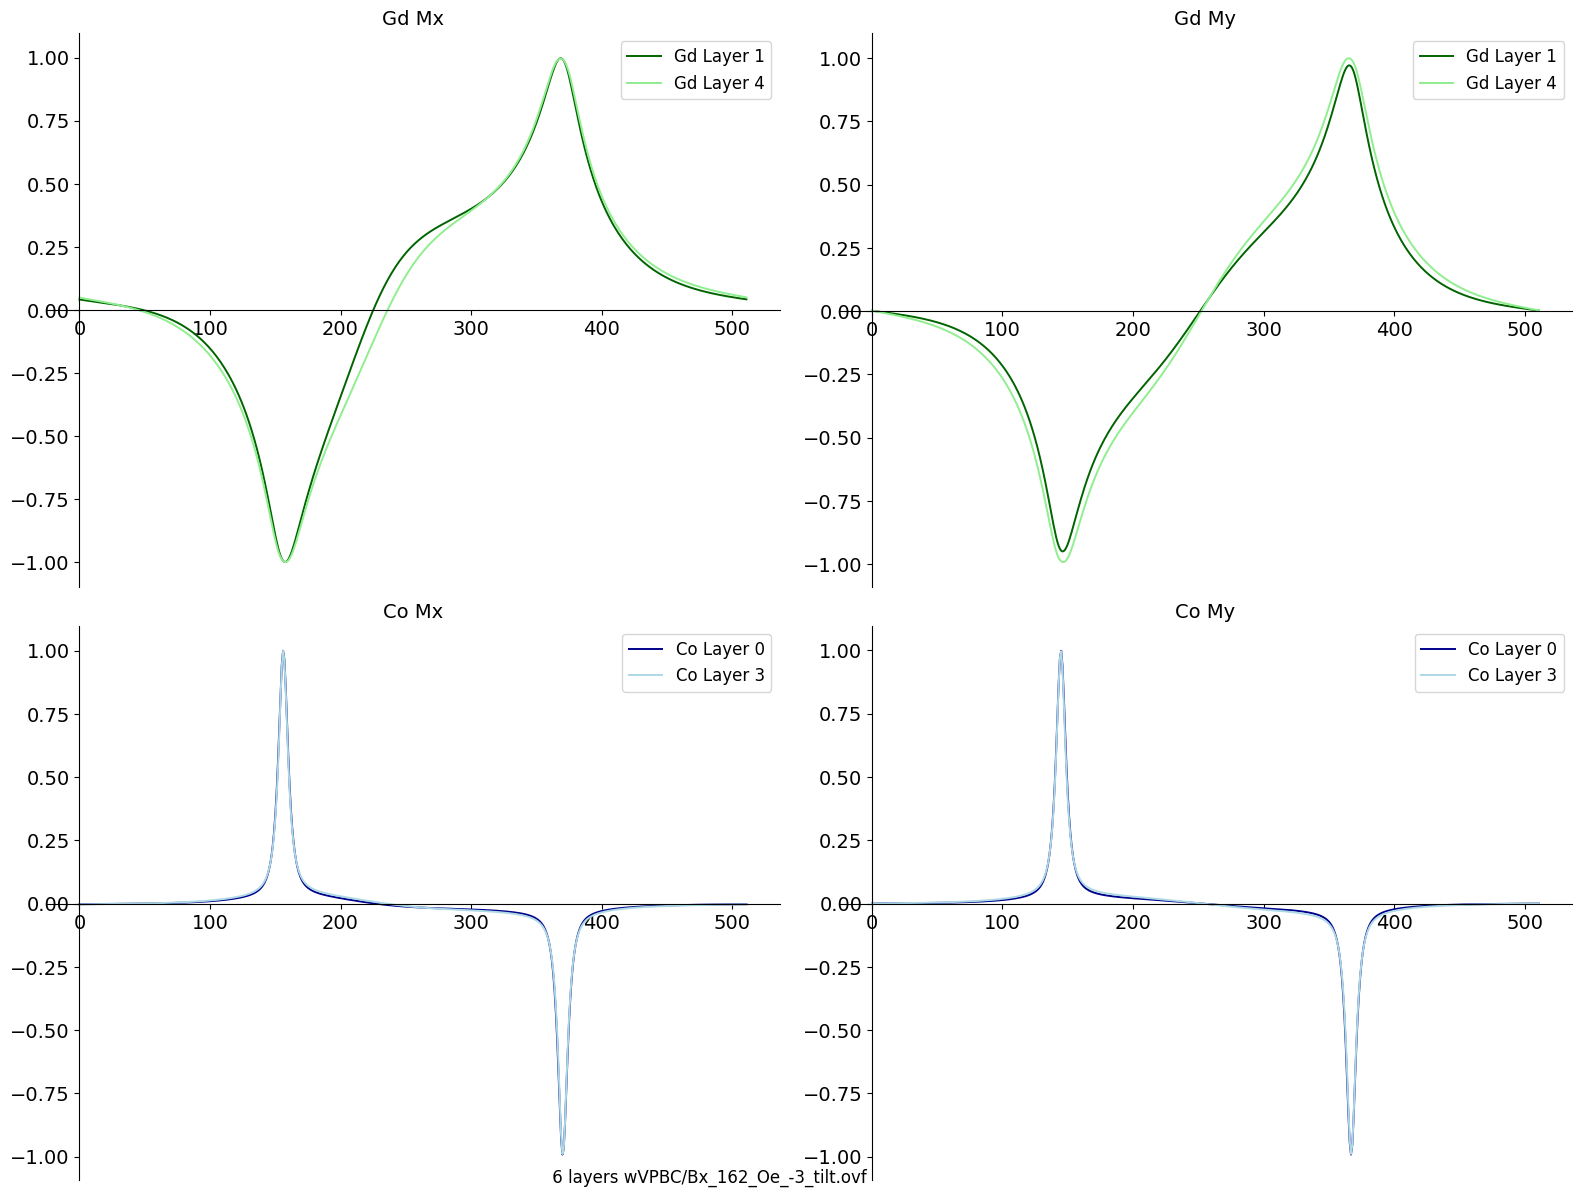

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(data, ax, title, colors, labels, linewidth=0.5):
    for idx, line in enumerate(data):
        ax.plot(line, color=colors[idx], label=labels[idx], linewidth=linewidth)

    # Setting spines: moving bottom spine to y=0 and left spine stays default
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Ticks handling: keeping y-ticks on the left and x-ticks bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # Increase the size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Set the title for each plot
    ax.set_title(title, fontsize=14)

    # Add a legend
    ax.legend(fontsize=12)

# Updated function to plot Co and Gd layers with the specified colors and legends
def show_my_2D(m, linewidth=1.4):
    # Extracting the required slices and plotting them
    indices_Co = list(range(0, 6, 3))  # Co's layers: 0 and 3
    indices_Gd = list(range(1, 5, 3))  # Gd's layers: 1 and 4
    slices_Co_x = [m[0, i, 250, :] for i in indices_Co]
    slices_Gd_x = [m[0, i, 250, :] for i in indices_Gd]
    slices_Co_y = [m[1, i, :, 250] for i in indices_Co]
    slices_Gd_y = [m[1, i, :, 250] for i in indices_Gd]

    # Defining specific colors for Co and Gd layers
    colors_Co = ['darkblue', 'lightblue']  # Colors for Co's layers 0 and 3
    colors_Gd = ['darkgreen', 'lightgreen']  # Colors for Gd's layers 1 and 4

    # Defining labels for Co and Gd layers
    labels_Co = ['Co Layer 0', 'Co Layer 3']
    labels_Gd = ['Gd Layer 1', 'Gd Layer 4']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Assign plots to their respective axes with appropriate titles and legends
    plot_lines(slices_Gd_x, axs[0, 0], "Gd Mx", colors_Gd, labels_Gd, linewidth)
    plot_lines(slices_Gd_y, axs[0, 1], "Gd My", colors_Gd, labels_Gd, linewidth)
    plot_lines(slices_Co_x, axs[1, 0], "Co Mx", colors_Co, labels_Co, linewidth)
    plot_lines(slices_Co_y, axs[1, 1], "Co My", colors_Co, labels_Co, linewidth)

    plt.tight_layout()
    fig.text(0.45, 0.01, f' {pathfile2}', ha='center', fontsize=12)
    plt.show()
    # Function end

show_my_2D(m2)


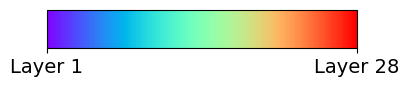

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

def create_color_bar():
    fig, ax = plt.subplots(figsize=(4, 0.5))  # Adjusted for horizontal layout

    # Define the colormap
    colormap = plt.cm.rainbow

    # Create a Normalize object for mapping values to colors
    norm = Normalize(vmin=-1.0, vmax=1.0)

    # Create a ScalarMappable to use for the color bar
    scalar_mappable = ScalarMappable(norm=norm, cmap=colormap)

    # Create the color bar
    color_bar = ColorbarBase(ax, cmap=colormap, norm=norm, orientation='horizontal')

    # Set the color bar labels
    color_bar.set_ticks([-1.0, 1.0])
    color_bar.set_ticklabels(['Layer 1', 'Layer 28'], fontsize=14) # Tickszie

    plt.show()
    # Function end
create_color_bar()
